# 🧬 Ctrl-Alt-Biology AIxBio: Introduction to Machine Learning — Workshop Notebook

This notebook is split into two parts:

| Part | Topic | When |
|------|-------|------|
| **Part 1** | Data exploration with Python | First session |
| **Part 3** | Deep learning with PyTorch | Third session |

> **No prior coding experience needed.**  
> Run each cell with **Shift + Enter** and read the output before moving on.  
> Every code cell has plain-English comments explaining what each line does.


---
## Part 1 — Exploring the Data

### 1.1 · Install & import libraries

A *library* is a collection of pre-written code that saves us from reinventing the wheel.  
Run the cell below once — it installs one extra package and loads everything we need.


In [104]:
# Install the UCI dataset downloader (comes pre-installed on most systems,
# but this line makes sure it is present on Google Colab)
!pip install ucimlrepo --quiet

import pandas as pd          # DataFrames — think Excel in Python
import numpy as np           # Fast numerical arrays and maths
import matplotlib.pyplot as plt  # Core plotting library
import seaborn as sns        # Higher-level, prettier plots built on matplotlib
from matplotlib.lines import Line2D

# Make all plots look a bit cleaner
plt.rcParams.update({'figure.dpi': 110, 'axes.spines.top': False,
                     'axes.spines.right': False})

print("Libraries loaded successfully!")


Libraries loaded successfully!


### 1.2 · Load the Breast Cancer Wisconsin Dataset

This is a classic, publicly available clinical dataset from the University of Wisconsin.  
Each row is a **biopsy** of a tumour. From a digitised image of the biopsy, 30 numerical  
measurements were computed describing the cell nuclei (size, shape, texture …).  
The *target* (what we want to predict) is whether the tumour is **Malignant** or **Benign**.


In [105]:
from ucimlrepo import fetch_ucirepo

# Download dataset — id=17 is Breast Cancer Wisconsin (Diagnostic)
dataset = fetch_ucirepo(id=17)

# X = features (the 30 measurements), y = target (M/B label)
X = dataset.data.features
y = dataset.data.targets

print(f"Dataset loaded!")
print(f"  Rows (patients) : {X.shape[0]}")
print(f"  Columns (features): {X.shape[1]}")


Dataset loaded!
  Rows (patients) : 569
  Columns (features): 30


### 1.3 · First look at the data

`head()` shows the first five rows — like peeking at the top of a spreadsheet.  
Notice the 30 feature columns. Their names follow a pattern:

| Suffix | Meaning |
|--------|---------|
| `1` | Average value across all nuclei in the image |
| `2` | Standard error (how much it varies) |
| `3` | Mean of the three largest values (most extreme nuclei) |


In [106]:
# Show first 5 rows
X.head()


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [107]:
# Show the column names more clearly
print("Feature names:")
for i, col in enumerate(X.columns):
    print(f"  {i+1:2d}. {col}")


Feature names:
   1. radius1
   2. texture1
   3. perimeter1
   4. area1
   5. smoothness1
   6. compactness1
   7. concavity1
   8. concave_points1
   9. symmetry1
  10. fractal_dimension1
  11. radius2
  12. texture2
  13. perimeter2
  14. area2
  15. smoothness2
  16. compactness2
  17. concavity2
  18. concave_points2
  19. symmetry2
  20. fractal_dimension2
  21. radius3
  22. texture3
  23. perimeter3
  24. area3
  25. smoothness3
  26. compactness3
  27. concavity3
  28. concave_points3
  29. symmetry3
  30. fractal_dimension3


In [108]:
# Summary statistics: count, mean, std, min, quartiles, max
# Notice the very different scales — area is in the thousands, smoothness is < 0.2
X.describe().round(3)


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,...,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000
mean,14.127,19.290,91.969,654.889,0.096,0.104,0.089,0.049,0.181,0.063,...,16.269,25.677,107.261,880.583,0.132,0.254,0.272,0.115,0.290,0.084
std,3.524,4.301,24.299,351.914,0.014,0.053,0.080,0.039,0.027,0.007,...,4.833,6.146,33.603,569.357,0.023,0.157,0.209,0.066,0.062,0.018
min,6.981,9.710,43.790,143.500,0.053,0.019,0.000,0.000,0.106,0.050,...,7.930,12.020,50.410,185.200,0.071,0.027,0.000,0.000,0.156,0.055
25%,11.700,16.170,75.170,420.300,0.086,0.065,0.030,0.020,0.162,0.058,...,13.010,21.080,84.110,515.300,0.117,0.147,0.114,0.065,0.250,0.071
50%,13.370,18.840,86.240,551.100,0.096,0.093,0.062,0.034,0.179,0.062,...,14.970,25.410,97.660,686.500,0.131,0.212,0.227,0.100,0.282,0.080
75%,15.780,21.800,104.100,782.700,0.105,0.130,0.131,0.074,0.196,0.066,...,18.790,29.720,125.400,1084.000,0.146,0.339,0.383,0.161,0.318,0.092
max,28.110,39.280,188.500,2501.000,0.163,0.345,0.427,0.201,0.304,0.097,...,36.040,49.540,251.200,4254.000,0.223,1.058,1.252,0.291,0.664,0.208


### 1.4 · What are we predicting? The target variable

The target column `Diagnosis` has two values:
- **M** = Malignant (cancerous)
- **B** = Benign (non-cancerous)

This is a **binary classification** problem — the model needs to output one of two categories.


In [109]:
# Flatten y to a 1-D Series for easier use
y_series = y.iloc[:, 0]

# Count how many of each class we have
counts = y_series.value_counts()
print(counts)
print(f"\nMalignant: {counts['M']} ({counts['M']/len(y_series)*100:.1f}%)")
print(f"Benign:    {counts['B']} ({counts['B']/len(y_series)*100:.1f}%)")


Diagnosis
B    357
M    212
Name: count, dtype: int64

Malignant: 212 (37.3%)
Benign:    357 (62.7%)


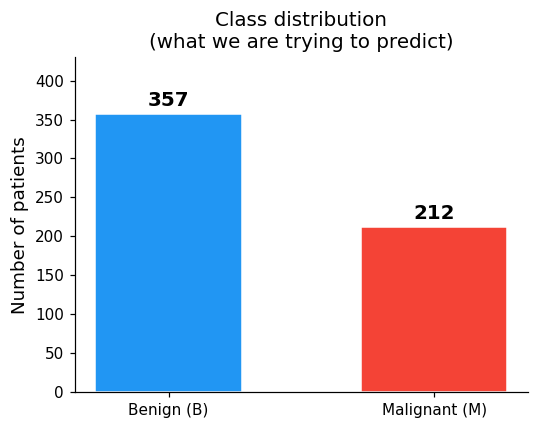


 The dataset is slightly imbalanced: more benign than malignant cases.
   This is realistic — and something to keep in mind when evaluating models.


In [110]:
# Visualise the class balance as a bar chart
fig, ax = plt.subplots(figsize=(5, 4))

colors = ['#2196F3', '#F44336']
bars = ax.bar(['Benign (B)', 'Malignant (M)'],
              [counts['B'], counts['M']],
              color=colors, edgecolor='white', width=0.55)

# Add count labels on the bars
for bar, count in zip(bars, [counts['B'], counts['M']]):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
            str(count), ha='center', va='bottom', fontsize=13, fontweight='bold')

ax.set_ylabel('Number of patients', fontsize=12)
ax.set_title('Class distribution\n(what we are trying to predict)', fontsize=13)
ax.set_ylim(0, 430)
plt.tight_layout()
plt.show()

print("\n The dataset is slightly imbalanced: more benign than malignant cases.")
print("   This is realistic — and something to keep in mind when evaluating models.")


### 1.5 · Do individual features separate the two classes?

A good feature for classification is one where the **distribution looks different**  
between Malignant and Benign cases. Let's start with `radius1`.

The measurements were taken from digitised images of fine-needle aspirate (FNA) biopsies.  
Here is what `radius1` actually represents:

> The mean of distances from the centre of each cell nucleus to its perimeter — essentially, the average nucleus size.


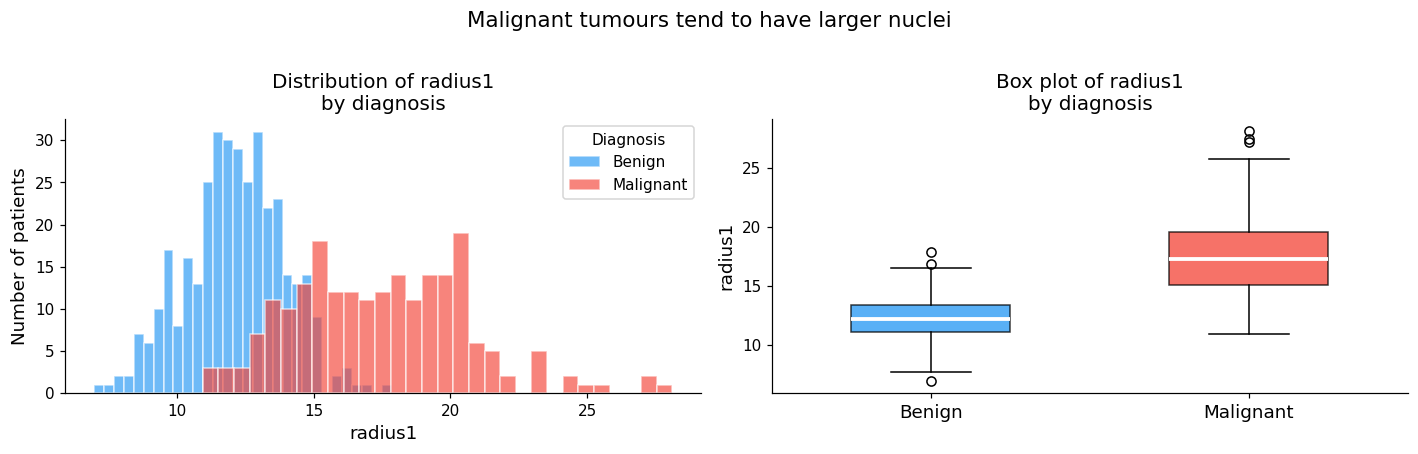


Benign    — mean radius: 12.15 ± 1.78
Malignant — mean radius: 17.46 ± 3.20


In [111]:
# Build a combined DataFrame with the target attached — useful for plotting
df = X.copy()
df['Diagnosis'] = y_series.values   # add the M/B column

# ── Overlapping histograms ──────────────────────────────────────────────────────
fig, axes = plt.subplots(1, 2, figsize=(13, 4))

# Left: histograms
for label, color, name in [('B', '#2196F3', 'Benign'), ('M', '#F44336', 'Malignant')]:
    axes[0].hist(df[df['Diagnosis'] == label]['radius1'],
                 bins=30, alpha=0.65, color=color, label=name, edgecolor='white')

axes[0].set_xlabel('radius1', fontsize=12)
axes[0].set_ylabel('Number of patients', fontsize=12)
axes[0].set_title('Distribution of radius1\nby diagnosis', fontsize=13)
axes[0].legend(title='Diagnosis')

# Right: box plots — shows median, quartiles, and outliers
data_B = df[df['Diagnosis'] == 'B']['radius1']
data_M = df[df['Diagnosis'] == 'M']['radius1']

bp = axes[1].boxplot([data_B, data_M],
                     patch_artist=True, widths=0.5,
                     medianprops=dict(color='white', linewidth=2.5))
bp['boxes'][0].set_facecolor('#2196F3')
bp['boxes'][1].set_facecolor('#F44336')
bp['boxes'][0].set_alpha(0.75)
bp['boxes'][1].set_alpha(0.75)

axes[1].set_xticklabels(['Benign', 'Malignant'], fontsize=12)
axes[1].set_ylabel('radius1', fontsize=12)
axes[1].set_title('Box plot of radius1\nby diagnosis', fontsize=13)

plt.suptitle('Malignant tumours tend to have larger nuclei', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

print(f"\nBenign    — mean radius: {data_B.mean():.2f} ± {data_B.std():.2f}")
print(f"Malignant — mean radius: {data_M.mean():.2f} ± {data_M.std():.2f}")


### 1.6 · Grid of feature distributions

Let's look at the 10 'mean' features together to get a sense of which ones  
separate the classes well and which ones don't.


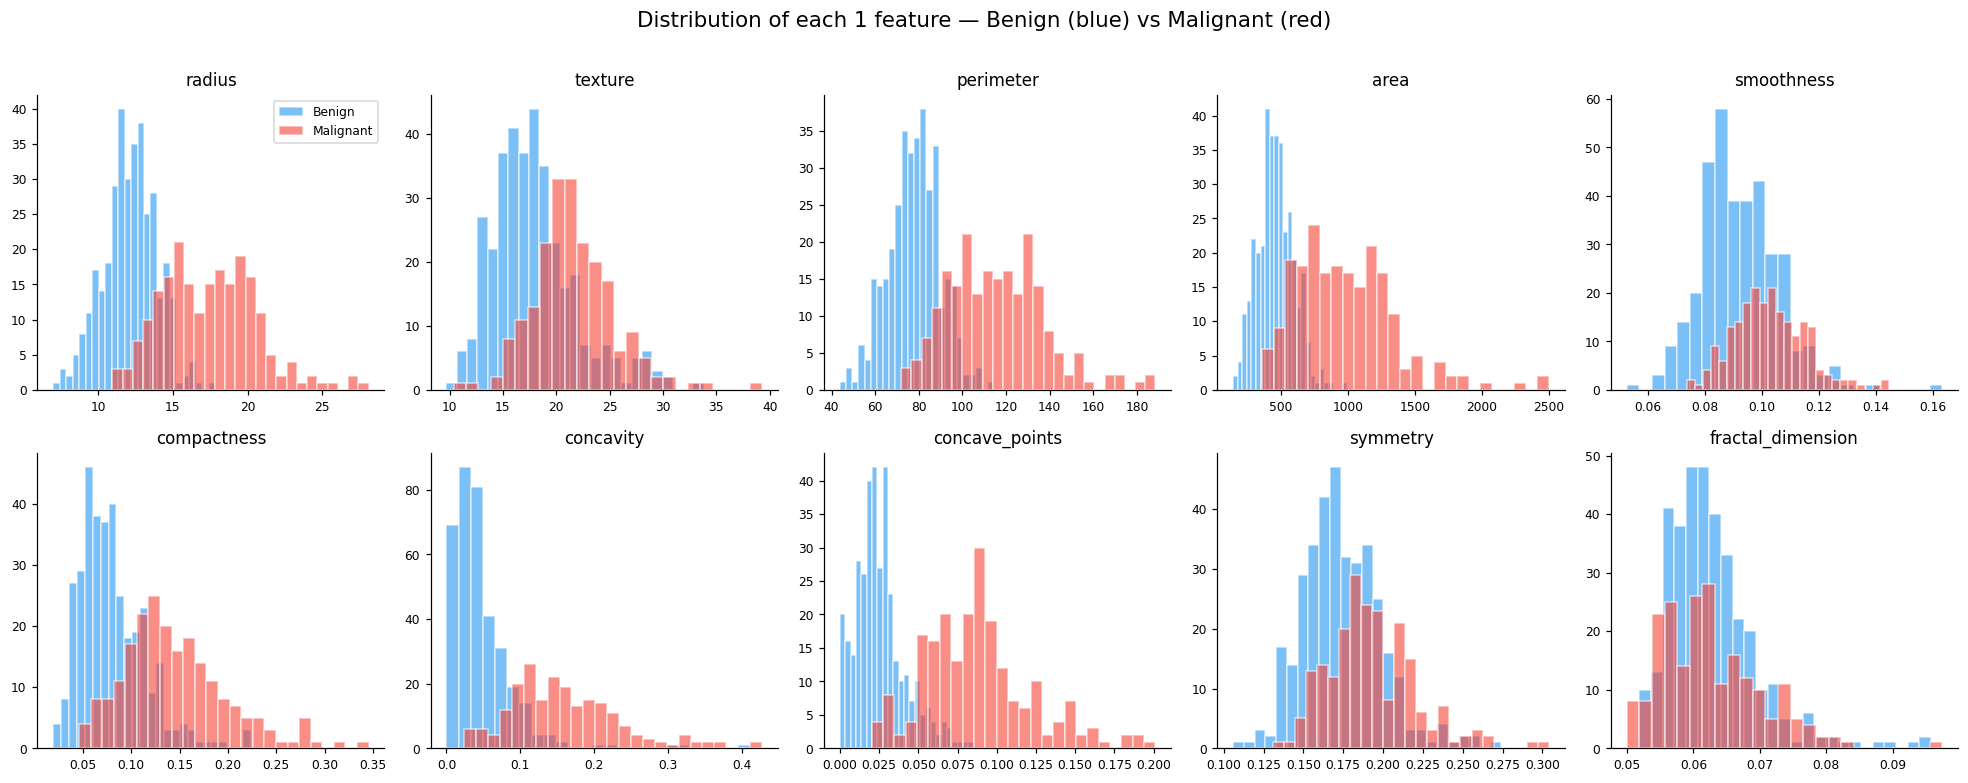


 Notice: radius, perimeter, area, concavity, concave_points separate well.
   fractal_dimension barely separates at all.


In [112]:
# Select the 10 mean features
one_features = [c for c in X.columns if c.endswith('1')]

fig, axes = plt.subplots(2, 5, figsize=(18, 7))
axes = axes.ravel()

for i, feat in enumerate(one_features):
    for label, color, name in [('B', '#2196F3', 'Benign'), ('M', '#F44336', 'Malignant')]:
        axes[i].hist(df[df['Diagnosis'] == label][feat],
                     bins=25, alpha=0.6, color=color, label=name, edgecolor='white')
    axes[i].set_title(feat.replace('1', ''), fontsize=11)
    axes[i].set_xlabel('')
    axes[i].tick_params(labelsize=8)
    if i == 0:
        axes[i].legend(fontsize=8)

fig.suptitle('Distribution of each 1 feature — Benign (blue) vs Malignant (red)',
             fontsize=14, y=1.01)
plt.tight_layout()
plt.show()

print("\n Notice: radius, perimeter, area, concavity, concave_points separate well.")
print("   fractal_dimension barely separates at all.")


### 1.7 · Scatter plot: seeing two features at once

A scatter plot puts two features on the axes. Points are coloured by diagnosis.  
Can a straight line separate the two groups? (That is what a linear classifier tries to do.)


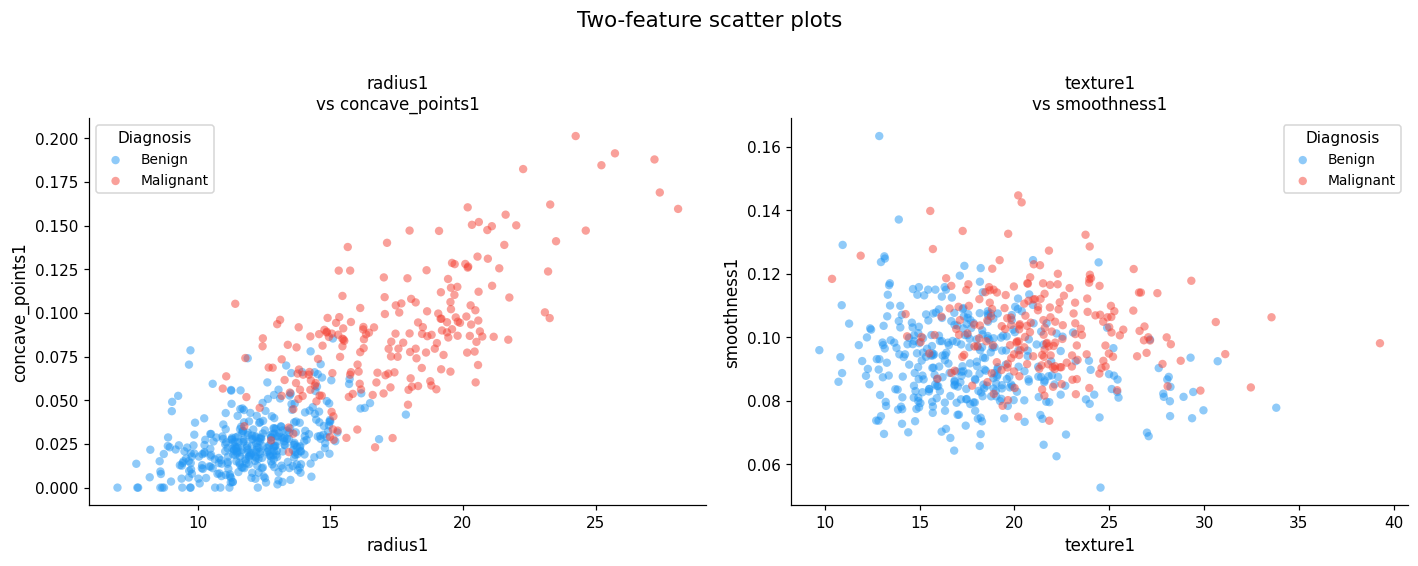


 Left panel: the two classes mostly separate — a good pair of features!
   Right panel: much more overlap — harder for a model to use.


In [113]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

pairs = [('radius1', 'concave_points1'),
         ('texture1', 'smoothness1')]

for ax, (fx, fy) in zip(axes, pairs):
    for label, color, name in [('B', '#2196F3', 'Benign'), ('M', '#F44336', 'Malignant')]:
        sub = df[df['Diagnosis'] == label]
        ax.scatter(sub[fx], sub[fy],
                   color=color, alpha=0.5, s=30, label=name, edgecolors='none')
    ax.set_xlabel(fx, fontsize=11)
    ax.set_ylabel(fy, fontsize=11)
    ax.set_title(f'{fx}\nvs {fy}', fontsize=11)
    ax.legend(title='Diagnosis', fontsize=9)

plt.suptitle('Two-feature scatter plots', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

print("\n Left panel: the two classes mostly separate — a good pair of features!")
print("   Right panel: much more overlap — harder for a model to use.")


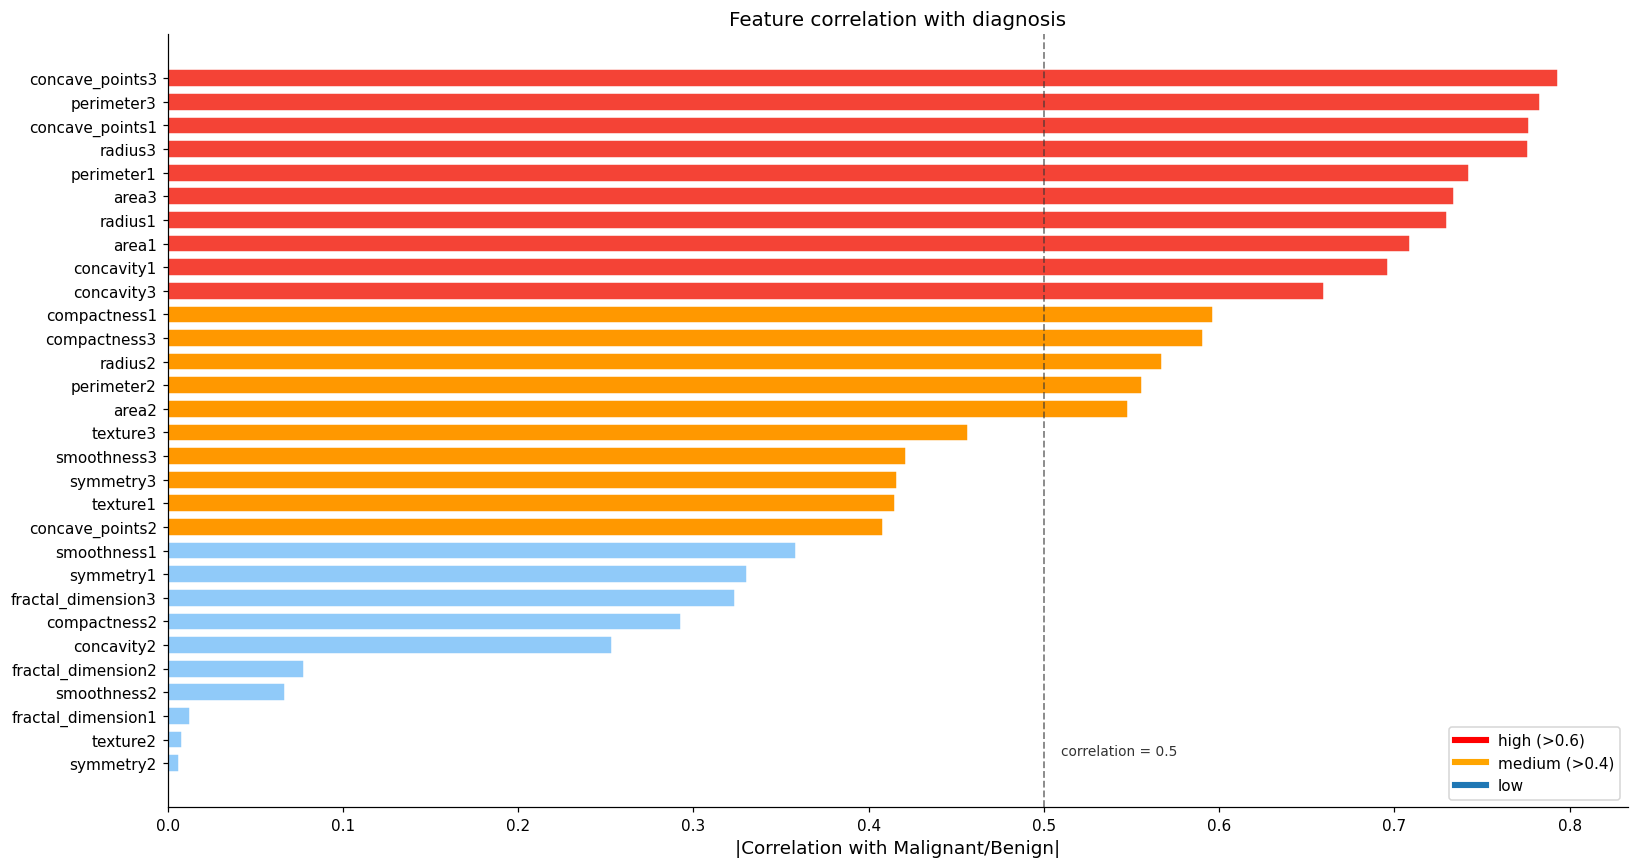


Top 5 most predictive features:
  concave_points3                      r = 0.794
  perimeter3                           r = 0.783
  concave_points1                      r = 0.777
  radius3                              r = 0.776
  perimeter1                           r = 0.743


In [114]:
# Encode diagnosis as 1/0 for correlation calculation
y_numeric = (y_series == 'M').astype(int)

# Correlation of every feature with the target
corr_with_target = X.corrwith(y_numeric).abs().sort_values(ascending=True)

# ── Horizontal bar chart ───────────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(15, 8))

colors = ['#F44336' if v > 0.6 else '#FF9800' if v > 0.4 else '#90CAF9'
          for v in corr_with_target]

ax.barh(corr_with_target.index, corr_with_target.values,
        color=colors, edgecolor='white', height=0.75)

# Reference line at 0.5
ax.axvline(0.5, color='#333', linestyle='--', lw=1.2, alpha=0.6)
ax.text(0.51, 0.5, 'correlation = 0.5', va='center', fontsize=9, color='#333')

ax.set_xlabel('|Correlation with Malignant/Benign|', fontsize=12)
ax.set_title('Feature correlation with diagnosis', fontsize=13)
legend_elements = [
    Line2D([0], [0], color='red', lw=4, label='high (>0.6)'),
    Line2D([0], [0], color='orange', lw=4, label='medium (>0.4)'),
    Line2D([0], [0], color='tab:blue', lw=4, label='low')
]

plt.legend(handles=legend_elements)
plt.tight_layout()
plt.show()

print("\nTop 5 most predictive features:")
for feat, val in corr_with_target.sort_values(ascending=False).head(5).items():
    print(f"  {feat:<35s}  r = {val:.3f}")


### 1.8 · Which features are most predictive?

We can compute the **correlation** between each feature and the diagnosis  
(encoded as 1 = Malignant, 0 = Benign).  
A high absolute correlation means the feature varies strongly with the diagnosis.

> This is a rough guide only — correlations are linear, and ML models can exploit  
> non-linear relationships too. But it's a great starting point.


### 1.9 · Pairplot of the most predictive features

A pairplot shows **every combination** of a small set of features.  
The diagonal shows distributions; off-diagonal panels show scatter plots.  
If the two colours separate well, those features will be useful for classification.


Top 4 features: ['concave_points3', 'perimeter3', 'concave_points1', 'radius3']


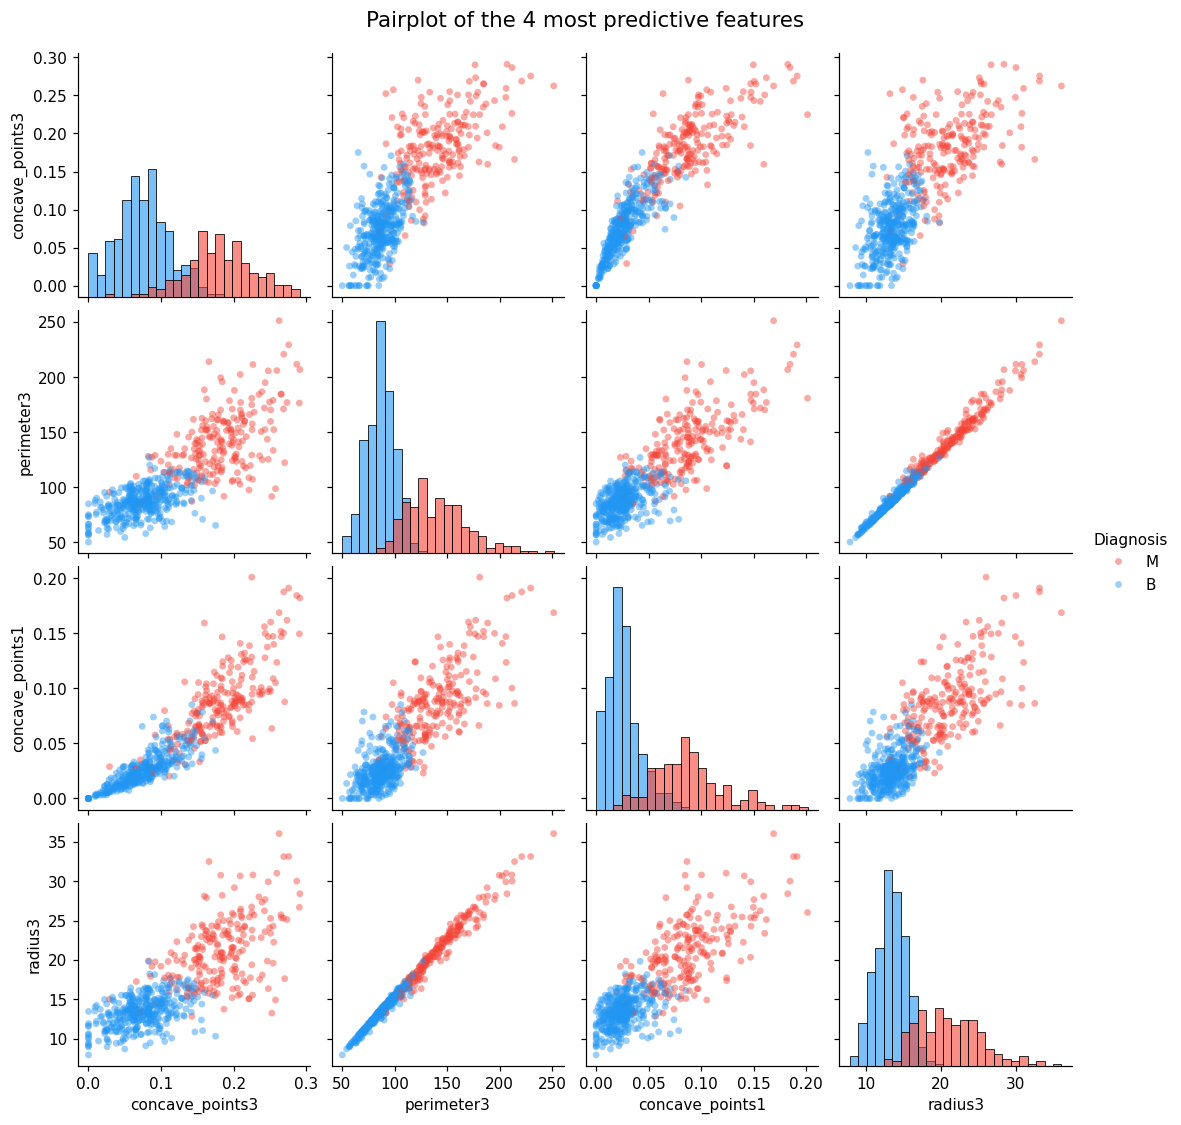


 Notice how well the top features separate the two classes.
   This is why a model can achieve high accuracy on this dataset.


In [115]:
# Pick top 4 most correlated features for readability
top4 = corr_with_target.sort_values(ascending=False).head(4).index.tolist()
print("Top 4 features:", top4)

plot_df = df[top4 + ['Diagnosis']].copy()

g = sns.pairplot(plot_df, hue='Diagnosis',
                 palette={'B': '#2196F3', 'M': '#F44336'},
                 plot_kws={'alpha': 0.45, 's': 20, 'edgecolor': 'none'},
                 diag_kind='hist',
                 diag_kws={'alpha': 0.6, 'bins': 25})

g.fig.suptitle('Pairplot of the 4 most predictive features', y=1.02, fontsize=14)
plt.show()

print("\n Notice how well the top features separate the two classes.")
print("   This is why a model can achieve high accuracy on this dataset.")


### 1.10 · Correlation between features

Features can also be correlated with *each other* — this is called **multicollinearity**.  
For example, radius, perimeter, and area all measure tumour size and so they move together.  
Later algorithms (like PCA) can handle this; for now, it is good to be aware of it.


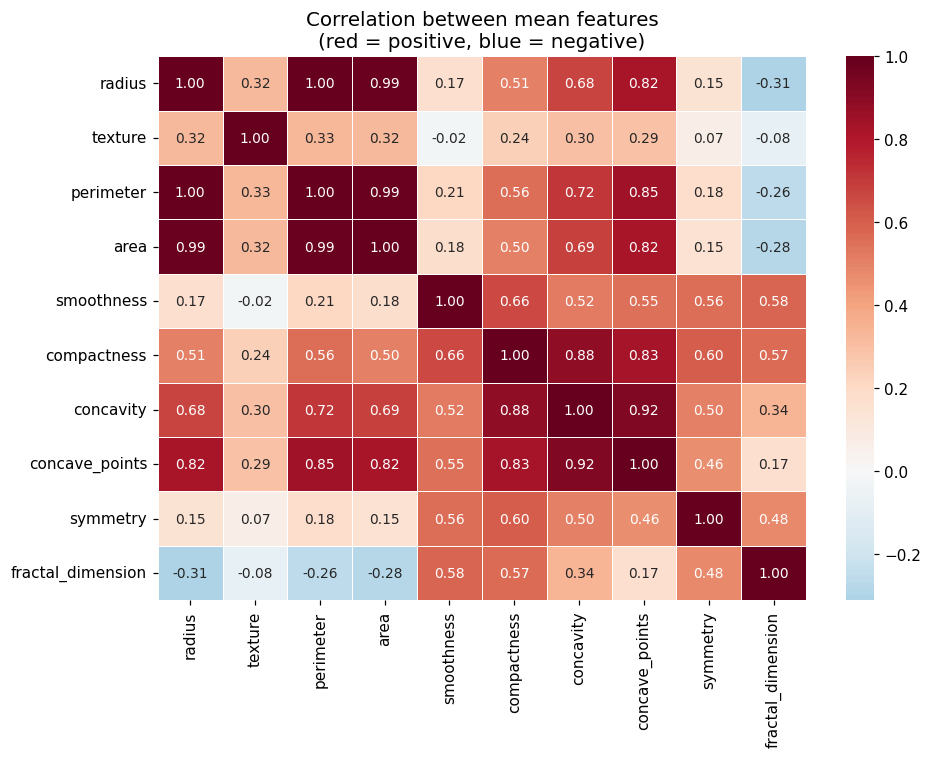


 Radius, perimeter, and area are almost perfectly correlated (r > 0.99).
   They all measure the same thing: tumour size.
   Models need to handle this carefully — this is where PCA (Part 2) helps.


In [116]:
# Use only the 10 mean features to keep the heatmap readable
mean_df = X[[c for c in X.columns if c.endswith('1')]]

# Shorten column names for display
short_names = [c.replace('1', '') for c in mean_df.columns]

fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(mean_df.set_axis(short_names, axis=1).corr(),
            annot=True, fmt='.2f', cmap='RdBu_r',
            center=0, ax=ax, linewidths=0.4,
            annot_kws={'size': 9})

ax.set_title('Correlation between mean features\n'
             '(red = positive, blue = negative)', fontsize=13)
plt.tight_layout()
plt.show()

print("\n Radius, perimeter, and area are almost perfectly correlated (r > 0.99).")
print("   They all measure the same thing: tumour size.")
print("   Models need to handle this carefully — this is where PCA (Part 2) helps.")


---
### Exercise 1 — Explore a feature yourself

Below is a template that plots the histogram for any feature you choose.  
**Your task:** change the `feature` variable and re-run the cell.

Try one from each group and compare them:
- High correlation: `'concave_points1'`, `'perimeter3'`  
- Low correlation: `'fractal_dimension1'`, `'symmetry1'`

**Bonus question:** Does a feature with low correlation look completely useless,  
or could it still add information when *combined* with other features?


Correlation with diagnosis: 0.730


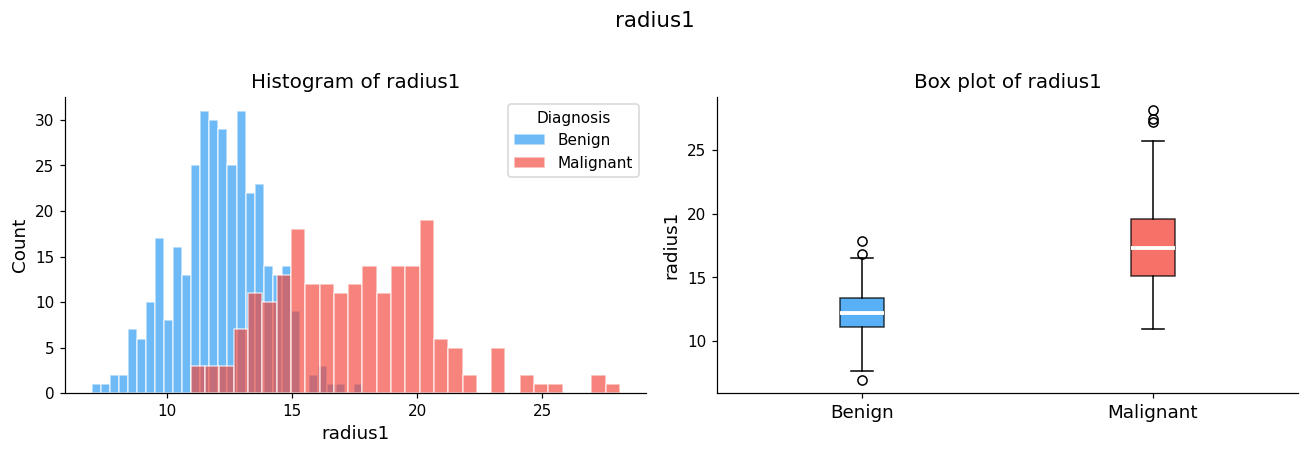

In [117]:
# Change this to any column name from the list printed earlier
feature = 'radius1'

# --- Do not change below this line ---
if feature not in df.columns:
    print(f" '{feature}' not found. Available features:")
    print([c for c in df.columns if c != 'Diagnosis'])
else:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histogram
    for label, color, name in [('B', '#2196F3', 'Benign'), ('M', '#F44336', 'Malignant')]:
        axes[0].hist(df[df['Diagnosis'] == label][feature],
                     bins=30, alpha=0.65, color=color, label=name, edgecolor='white')
    axes[0].set_xlabel(feature, fontsize=12)
    axes[0].set_ylabel('Count', fontsize=12)
    axes[0].set_title(f'Histogram of {feature}', fontsize=13)
    axes[0].legend(title='Diagnosis')

    # Box plot
    data_B = df[df['Diagnosis'] == 'B'][feature]
    data_M = df[df['Diagnosis'] == 'M'][feature]
    bp = axes[1].boxplot([data_B, data_M], patch_artist=True,
                         medianprops=dict(color='white', linewidth=2.5))
    bp['boxes'][0].set_facecolor('#2196F3'); bp['boxes'][0].set_alpha(0.75)
    bp['boxes'][1].set_facecolor('#F44336'); bp['boxes'][1].set_alpha(0.75)
    axes[1].set_xticklabels(['Benign', 'Malignant'], fontsize=12)
    axes[1].set_ylabel(feature, fontsize=12)
    axes[1].set_title(f'Box plot of {feature}', fontsize=13)

    # Print correlation
    r = abs(X[feature].corr(y_numeric))
    print(f"Correlation with diagnosis: {r:.3f}")

    plt.suptitle(f'{feature}', fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()


---
###  Summary — What we have learned so far

- The dataset has **569 patients** (biopsies), **30 features**, and a **binary target** (M/B)  
- Features vary hugely in scale — standardisation will be needed before modelling  
- Some features (radius, concavity, concave points) **separate the classes well**  
- Others (fractal dimension, symmetry) barely do  
- Many features are **highly correlated** with each other — they measure overlapping things  
- Visualising the data *before* building a model is always time well spent!

> The next session (Part 2) will use scikit-learn to apply PCA and classical ML methods.  
> Part 3 (below) uses PyTorch to train a neural network — continue when you are ready.


---
---
# Part 3 — Deep Learning with PyTorch

## The big idea

Machine learning models learn by:
1. Making a **prediction** with their current parameters
2. Measuring how wrong they are (the **loss**)
3. Computing how each parameter contributed to that error (the **gradient**)
4. Nudging every parameter a tiny bit in the direction that reduces the loss
5. **Repeating** thousands of times

Step 3 — computing gradients — is the mathematical heart of training.  
We will first do it **entirely by hand** so you can see exactly what is happening,  
then introduce PyTorch's **autograd** which does it automatically for any model.

We will build up to classifying tumours step by step:
- **Section A**: Gradient descent by hand — understand every line of maths
- **Section A2**: The same example using PyTorch autograd
- **Section B**: Apply it to classify tumours with a linear model
- **Section C**: Add hidden layers to make a full neural network


### 3.1 · Import PyTorch

In [118]:
import torch
import torch.nn as nn
import math
import matplotlib.pyplot as plt
import numpy as np

# Re-load the dataset in case this section is run in a fresh session
from ucimlrepo import fetch_ucirepo
import pandas as pd

dataset = fetch_ucirepo(id=17)
X = dataset.data.features
y = dataset.data.targets

print(f"PyTorch version: {torch.__version__}")
print(f"Data loaded: {X.shape[0]} patients, {X.shape[1]} features")


PyTorch version: 2.10.0+cpu
Data loaded: 569 patients, 30 features


---
## Section A — Gradient Descent by Hand

### The problem: fitting a polynomial to sin(x)

We want to find `a, b, c, d` such that:

$$f(x) = a + bx + cx^2 + dx^3 \approx \sin(x)$$

We will minimise the **sum of squared errors** (loss):

$$L = \sum_i (f(x_i) - \sin(x_i))^2$$

### Computing gradients by hand

To update each parameter we need to know: *if I increase this parameter slightly,  
how much does the loss change?* That is the **gradient** — the derivative of L  
with respect to each parameter.

Using the **chain rule** of calculus:

$$\frac{\partial L}{\partial a} = \sum_i 2(f(x_i) - y_i) \cdot 1 = \sum_i 2 \cdot e_i$$

$$\frac{\partial L}{\partial b} = \sum_i 2(f(x_i) - y_i) \cdot x_i = \sum_i 2 \cdot e_i \cdot x_i$$

$$\frac{\partial L}{\partial c} = \sum_i 2 \cdot e_i \cdot x_i^2 \qquad
\frac{\partial L}{\partial d} = \sum_i 2 \cdot e_i \cdot x_i^3$$

where $e_i = f(x_i) - y_i$ is the prediction error at point $i$.

Once we have the gradients, the **parameter update rule** is simply:

$$a \leftarrow a - \alpha \cdot \frac{\partial L}{\partial a}$$

where $\alpha$ is the **learning rate** — how big a step we take each iteration.

Let's implement this from scratch in PyTorch (we use PyTorch tensors just for  
efficient array operations — **no autograd yet**).


In [119]:
# -*- coding: utf-8 -*-
# ─────────────────────────────────────────────────────────────────────────────
# POLYNOMIAL FITTING WITH HAND-WRITTEN BACKPROPAGATION
# ─────────────────────────────────────────────────────────────────────────────

torch.manual_seed(3141)

# ── Data: 2000 points of sin(x) between -π and +π ────────────────────────────
x = torch.linspace(-math.pi, math.pi, 2000)
y_true = torch.sin(x)

# ── Randomly initialise the four polynomial coefficients ─────────────────────
a = torch.randn(())
b = torch.randn(())
c = torch.randn(())
d = torch.randn(())

learning_rate = 1e-6
losses_manual = []

# We'll save snapshots of the curve at these steps to plot later
save_at      = {0, 99, 499, 999, 1999}
snapshots_hw = {}   # step → predicted y values

print(f"{'Step':>6}  {'Loss':>12}  {'a':>8}  {'b':>8}  {'c':>8}  {'d':>8}")
print("-" * 58)

for t in range(2000):

    # ── 1. Forward pass ───────────────────────────────────────────────────────
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # ── 2. Loss: sum of squared errors ────────────────────────────────────────
    loss = (y_pred - y_true).pow(2).sum().item()
    losses_manual.append(loss)

    # Save snapshot and print progress at key steps
    if t in save_at:
        snapshots_hw[t] = y_pred.clone()
        print(f"{t+1:>6}  {loss:>12.1f}  {a.item():>8.4f}  {b.item():>8.4f}  {c.item():>8.4f}  {d.item():>8.4f}")

    # ── 3. BACKPROPAGATION — hand-written chain rule ───────────────────────────
    grad_y_pred = 2.0 * (y_pred - y_true)   # dL/df = 2·error at each point
    grad_a = grad_y_pred.sum()               # dL/da = Σ 2·e · 1
    grad_b = (grad_y_pred * x).sum()         # dL/db = Σ 2·e · x
    grad_c = (grad_y_pred * x ** 2).sum()    # dL/dc = Σ 2·e · x²
    grad_d = (grad_y_pred * x ** 3).sum()    # dL/dd = Σ 2·e · x³

    # ── 4. Gradient descent update ─────────────────────────────────────────────
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print()
print(f"Final: y = {a.item():.4f} + {b.item():.4f}x + {c.item():.4f}x² + {d.item():.4f}x³")
print(f"True:  sin(x) ≈ 0 + 1·x + 0·x² − 0.1667·x³")


  Step          Loss         a         b         c         d
----------------------------------------------------------
     1      975424.4    2.2170   -1.1559    0.3438   -1.6618
   100        4934.8    1.7657   -0.5725   -0.3044    0.1100
   500        1115.9    0.8842    0.2318   -0.1525   -0.0044
  1000         184.3    0.3725    0.6345   -0.0643   -0.0617
  2000          13.5    0.0661    0.8286   -0.0114   -0.0893

Final: y = 0.0660 + 0.8287x + -0.0114x² + -0.0893x³
True:  sin(x) ≈ 0 + 1·x + 0·x² − 0.1667·x³


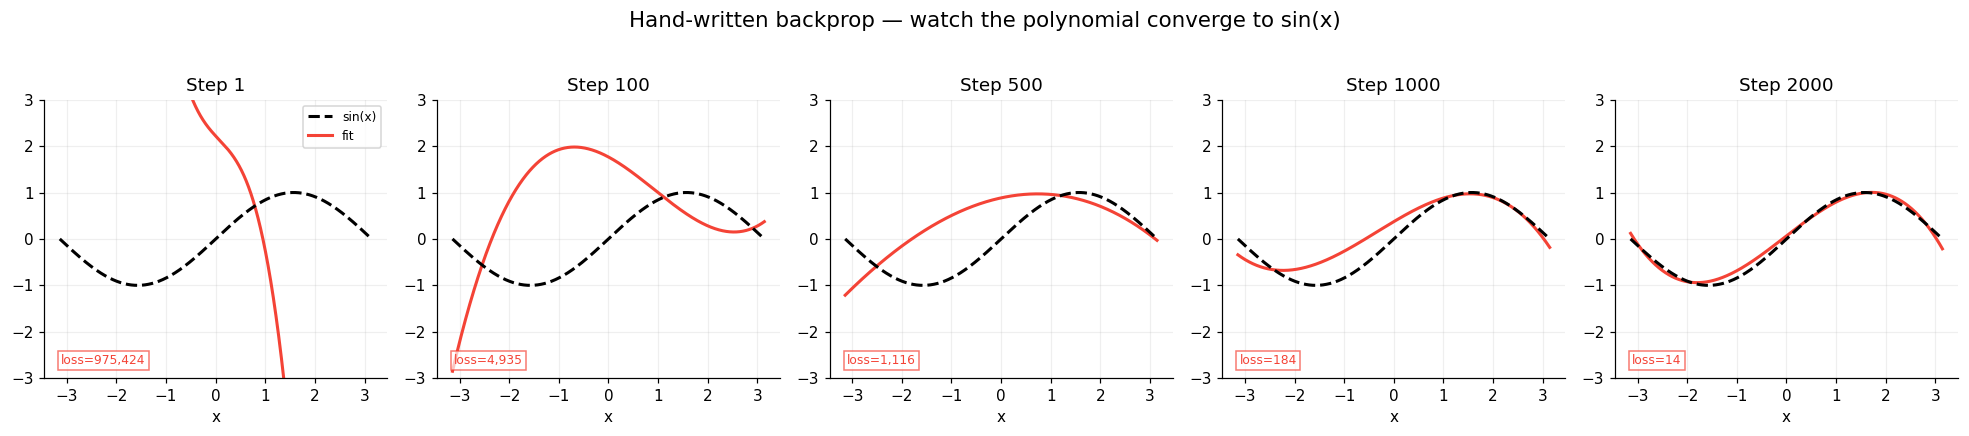

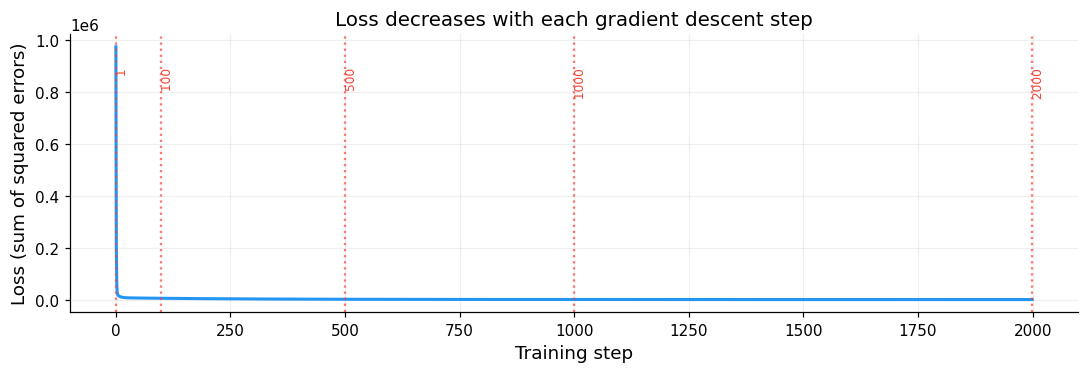

 Key observations:
   • The loss drops steeply in the first few hundred steps
   • By step 1000 the polynomial is very close to sin(x)
   • The parameters converge towards the true Taylor coefficients: a≈0, b≈1, c≈0, d≈−0.167


In [120]:
# ── Plot 1: Snapshots of the polynomial fit evolving over steps ───────────────
fig, axes = plt.subplots(1, 5, figsize=(18, 3.8))
step_labels = [1, 100, 500, 1000, 2000]
keys = [0, 99, 499, 999, 1999]

for ax, key, label in zip(axes, keys, step_labels):
    ax.plot(x.numpy(), y_true.numpy(), 'k--', lw=2, label='sin(x)', zorder=3)
    ax.plot(x.numpy(), snapshots_hw[key].numpy(), color='#F44336', lw=2, label='fit', zorder=2)
    ax.set_title(f'Step {label}', fontsize=12)
    ax.set_ylim(-3, 3)
    ax.set_xlabel('x')
    ax.grid(alpha=0.2)
    if key == 0:
        ax.legend(fontsize=8)
    # Annotate the loss
    ax.text(0.05, 0.05, f'loss={losses_manual[key]:,.0f}',
            transform=ax.transAxes, fontsize=8, color='#F44336',
            bbox=dict(facecolor='white', edgecolor='#F44336', alpha=0.7, pad=2))

fig.suptitle('Hand-written backprop — watch the polynomial converge to sin(x)',
             fontsize=14, y=1.03)
plt.tight_layout()
plt.show()

# ── Plot 2: Loss curve with step markers ──────────────────────────────────────
fig2, ax2 = plt.subplots(figsize=(10, 3.5))
ax2.plot(losses_manual, color='#2196F3', lw=2)
ax2.set_xlabel('Training step', fontsize=12)
ax2.set_ylabel('Loss (sum of squared errors)', fontsize=12)
ax2.set_title('Loss decreases with each gradient descent step', fontsize=13)
ax2.grid(alpha=0.2)

# Mark the snapshot steps
for key, label in zip(keys, step_labels):
    ax2.axvline(key, color='#F44336', linestyle=':', alpha=0.7)
    ax2.text(key, max(losses_manual)*0.92, f' {label}',
             fontsize=8, color='#F44336', rotation=90, va='top')

plt.tight_layout()
plt.show()

print(" Key observations:")
print("   • The loss drops steeply in the first few hundred steps")
print("   • By step 1000 the polynomial is very close to sin(x)")
print("   • The parameters converge towards the true Taylor coefficients: a≈0, b≈1, c≈0, d≈−0.167")


---
### Why does this matter — and why do we need autograd?

The maths above was manageable for **4 parameters** and a **simple polynomial**.  
But a modern neural network has **millions of parameters** arranged in complex layers.  
Deriving and coding every gradient by hand would be:

- **Extremely tedious** — thousands of derivative rules to write
- **Error-prone** — one mistake breaks the entire training
- **Non-reusable** — you would have to redo it for every new architecture

**PyTorch's autograd** solves this elegantly:

> Instead of you computing gradients, PyTorch silently *records* every mathematical  
> operation performed on tensors marked with `requires_grad=True`.  
> When you call `loss.backward()`, it traverses this record in reverse  
> and applies the chain rule automatically — for *any* network architecture.

Let's redo the exact same example using autograd.


---
## Section A2 — The Same Example with Autograd

The code below is almost identical to the hand-written version.  
The **only differences** are highlighted with `# ← AUTOGRAD`:

1. Parameters are created with `requires_grad=True` — PyTorch watches them
2. We call `loss.backward()` instead of computing gradients manually
3. We access `.grad` to read the computed gradients
4. We wrap the update in `torch.no_grad()` so the update itself is not tracked


In [121]:
torch.manual_seed(42)

# ── Same data ─────────────────────────────────────────────────────────────────
x = torch.linspace(-math.pi, math.pi, 2000)
y_true = torch.sin(x)

# ── Parameters with requires_grad=True ───────────────────────────────────────
a = torch.randn((), requires_grad=True)
b = torch.randn((), requires_grad=True)
c = torch.randn((), requires_grad=True)
d = torch.randn((), requires_grad=True)

learning_rate = 1e-6
losses_auto   = []
save_at_auto  = {0, 99, 499, 999, 1999}
snapshots_ag  = {}

print(f"{'Step':>6}  {'Loss':>12}  {'a.grad':>10}  {'b.grad':>10}")
print("-" * 46)

for t in range(2000):

    # ── 1. Forward pass — identical to before ────────────────────────────────
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # ── 2. Loss ───────────────────────────────────────────────────────────────
    loss = (y_pred - y_true).pow(2).sum()
    losses_auto.append(loss.item())

    if t in save_at_auto:
        with torch.no_grad():
            snapshots_ag[t] = (a + b*x + c*x**2 + d*x**3).clone()

    # ── 3. AUTOGRAD: one call computes ALL gradients ──────────────────────────
    loss.backward()    # ← replaces all the grad_a, grad_b, grad_c, grad_d lines

    # Print gradients at key steps so we can see them
    if t in save_at_auto:
        print(f"{t+1:>6}  {loss.item():>12.1f}  {a.grad.item():>10.4f}  {b.grad.item():>10.4f}")

    # ── 4. Update ─────────────────────────────────────────────────────────────
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad
        a.grad.zero_()
        b.grad.zero_()
        c.grad.zero_()
        d.grad.zero_()

print()
print(f"Final: y = {a.item():.4f} + {b.item():.4f}x + {c.item():.4f}x² + {d.item():.4f}x³")


  Step          Loss      a.grad      b.grad
----------------------------------------------
     1       17376.5   4435.2495  15683.9189
   100         463.8    419.7686  -1277.1184
   500          98.9    209.7161   -558.4225
  1000          20.9     88.3457   -198.5531
  2000           9.0     15.6780    -25.1010

Final: y = 0.0091 + 0.8446x + -0.0016x² + -0.0916x³


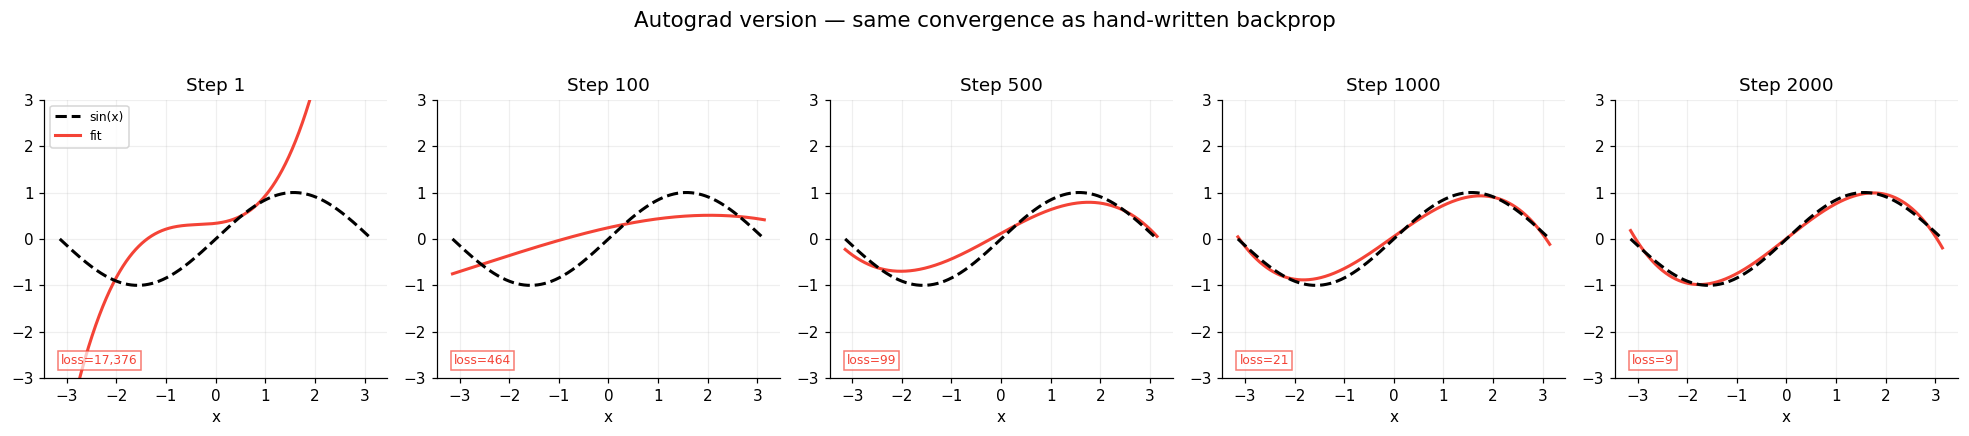

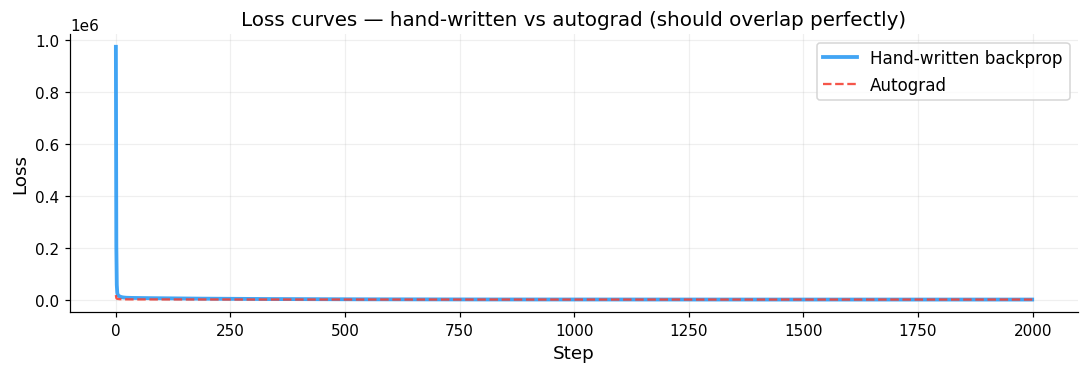

 Both curves are identical — autograd computed exactly the same gradients
   as our hand-written chain-rule code, but automatically.


In [122]:
# ── Plot 1: Snapshots from the autograd version ───────────────────────────────
fig, axes = plt.subplots(1, 5, figsize=(18, 3.8))
step_labels = [1, 100, 500, 1000, 2000]
keys = [0, 99, 499, 999, 1999]

for ax, key, label in zip(axes, keys, step_labels):
    ax.plot(x.numpy(), y_true.numpy(), 'k--', lw=2, label='sin(x)', zorder=3)
    ax.plot(x.numpy(), snapshots_ag[key].numpy(), color='#F44336', lw=2, label='fit', zorder=2)
    ax.set_title(f'Step {label}', fontsize=12)
    ax.set_ylim(-3, 3); ax.set_xlabel('x'); ax.grid(alpha=0.2)
    if key == 0: ax.legend(fontsize=8)
    ax.text(0.05, 0.05, f'loss={losses_auto[key]:,.0f}',
            transform=ax.transAxes, fontsize=8, color='#F44336',
            bbox=dict(facecolor='white', edgecolor='#F44336', alpha=0.7, pad=2))

fig.suptitle('Autograd version — same convergence as hand-written backprop',
             fontsize=14, y=1.03)
plt.tight_layout()
plt.show()

# ── Plot 2: Overlay loss curves — they should be identical ───────────────────
fig2, ax2 = plt.subplots(figsize=(10, 3.5))
ax2.plot(losses_manual, color='#2196F3', lw=2.5, label='Hand-written backprop', alpha=0.85)
ax2.plot(losses_auto,   color='#F44336', lw=1.5, linestyle='--', label='Autograd', alpha=0.9)
ax2.set_xlabel('Step', fontsize=12); ax2.set_ylabel('Loss', fontsize=12)
ax2.set_title('Loss curves — hand-written vs autograd (should overlap perfectly)', fontsize=13)
ax2.legend(fontsize=11); ax2.grid(alpha=0.2)
plt.tight_layout()
plt.show()

print(" Both curves are identical — autograd computed exactly the same gradients")
print("   as our hand-written chain-rule code, but automatically.")


### Using an Optimizer — the standard pattern

In practice, nobody writes the update loop manually either.  
`torch.optim` provides optimisers that handle the update and gradient reset  
in two clean lines: `optimizer.zero_grad()` and `optimizer.step()`.

We also switch to **Adam** — a smarter variant of gradient descent that  
adapts the learning rate for each parameter individually.  
This lets us use a much larger learning rate and converge faster.


In [123]:
torch.manual_seed(42)

x = torch.linspace(-math.pi, math.pi, 2000)
y_true = torch.sin(x)

a = torch.randn((), requires_grad=True)
b = torch.randn((), requires_grad=True)
c = torch.randn((), requires_grad=True)
d = torch.randn((), requires_grad=True)

# Adam optimizer — pass it the list of parameters to manage
optimizer = torch.optim.Adam([a, b, c, d], lr=0.05)   # much larger lr than before!

losses_adam = []
snapshots   = []
save_at     = {0, 5, 20, 60, 150, 499}

for t in range(500):   # only 500 steps needed (Adam converges faster)
    y_pred = a + b * x + c * x ** 2 + d * x ** 3
    loss   = (y_pred - y_true).pow(2).mean()   # mean (not sum) — common convention
    losses_adam.append(loss.item())

    if t in save_at:
        with torch.no_grad():
            snapshots.append((t, (a + b*x + c*x**2 + d*x**3).clone()))

    optimizer.zero_grad()   # reset gradients from previous step
    loss.backward()         # compute gradients via autograd
    optimizer.step()        # update a, b, c, d

print(f"Final loss : {losses_adam[-1]:.6f}")
print(f"y = {a.item():.4f} + {b.item():.4f}x + {c.item():.4f}x² + {d.item():.4f}x³")


Final loss : 0.004409
y = -0.0000 + 0.8567x + 0.0000x² + -0.0933x³


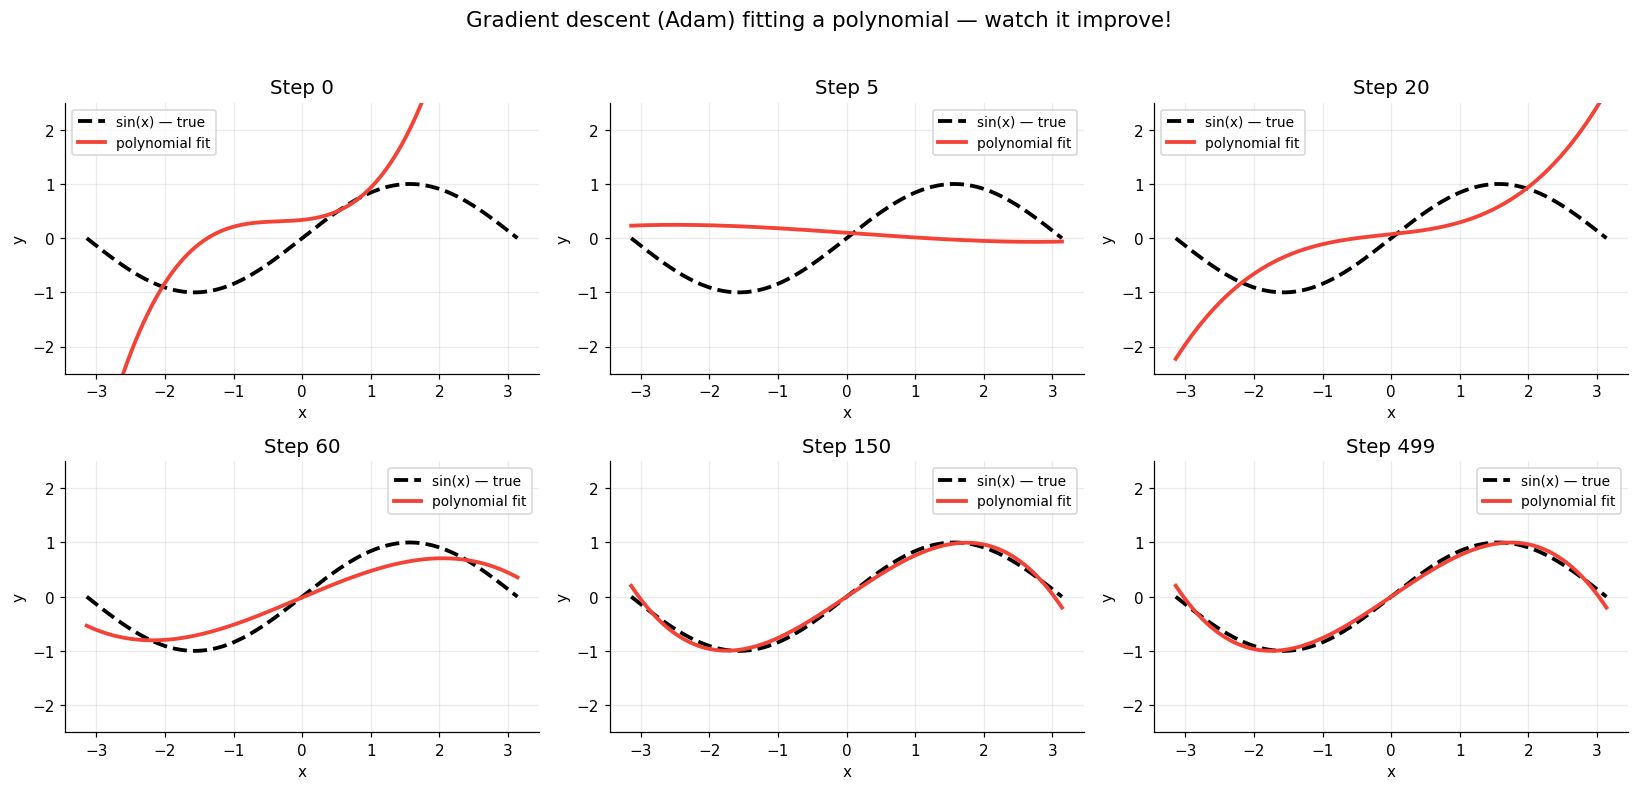

In [124]:
# ── Plot snapshots ────────────────────────────────────────────────────────────
fig, axes = plt.subplots(2, 3, figsize=(15, 7))
axes = axes.ravel()
x_np = x.numpy()

for ax, (iteration, y_snap) in zip(axes, snapshots):
    ax.plot(x_np, y_true.numpy(), 'k--', lw=2.5, label='sin(x) — true')
    ax.plot(x_np, y_snap.numpy(), color='#F44336', lw=2.5, label='polynomial fit')
    ax.set_title(f'Step {iteration}', fontsize=13)
    ax.set_ylim(-2.5, 2.5)
    ax.set_xlabel('x'); ax.set_ylabel('y')
    ax.legend(fontsize=9); ax.grid(alpha=0.25)

fig.suptitle('Gradient descent (Adam) fitting a polynomial — watch it improve!',
             fontsize=14, y=1.02)
plt.tight_layout()
plt.show()


---
### Exercise 2 — Change the target function

**Your task:** change the one line that defines `y_true` and re-run the training cells.

Options to try:
```python
y_true = torch.cos(x)       # cosine — should work well
y_true = torch.sin(2 * x)   # higher frequency — does the cubic polynomial manage?
y_true = torch.abs(x)       # absolute value — what happens? (not smooth at x=0!)
```

**Think about:** why might a cubic polynomial struggle with `sin(2x)`?  
How many extra parameters would help? What if you added `e * x**4 + f * x**5`?


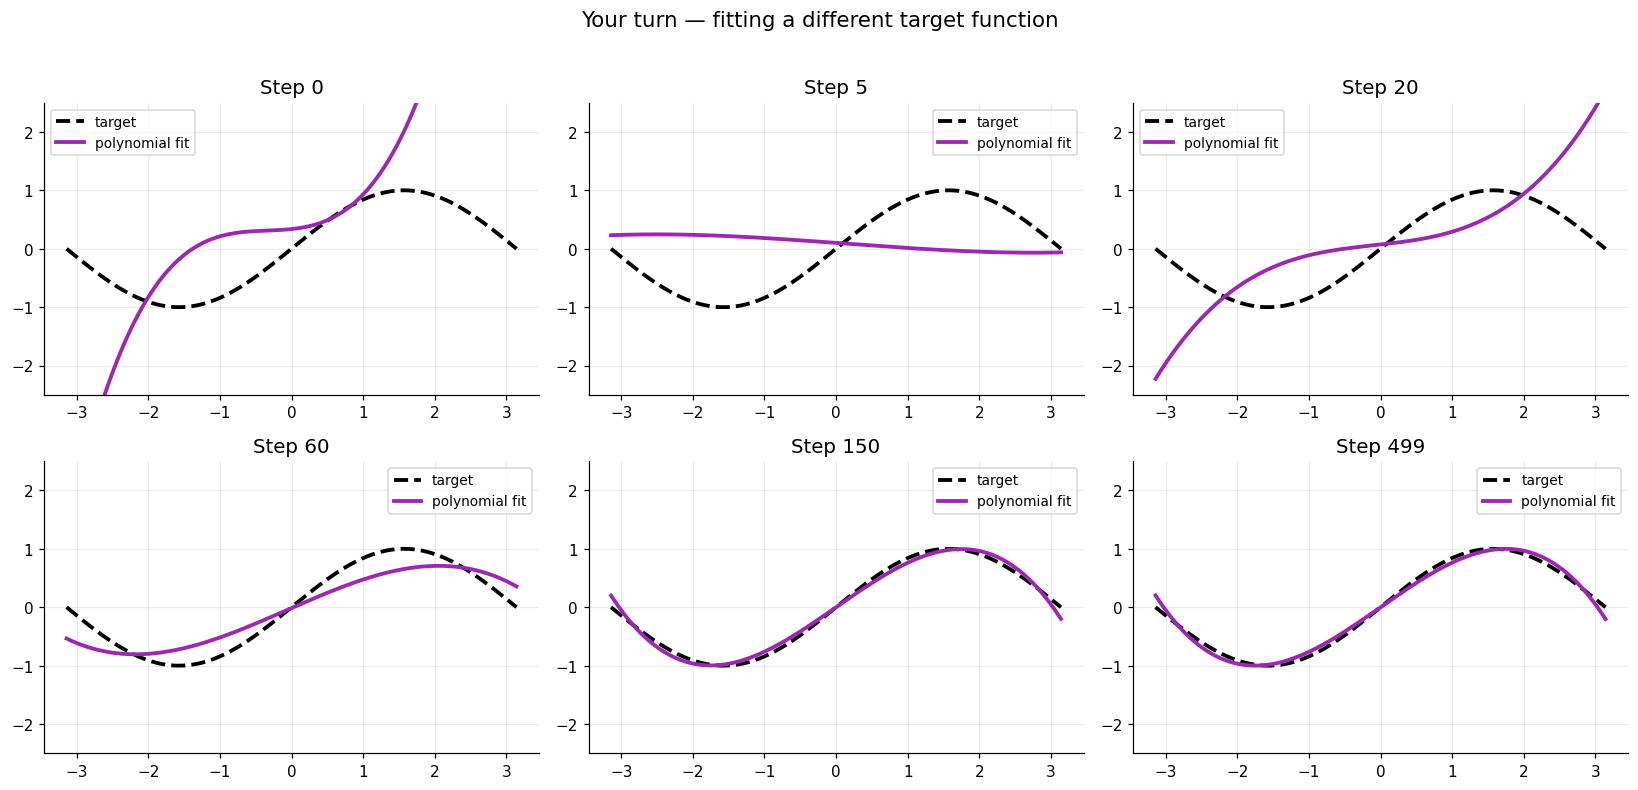

Final loss: 0.004409


In [125]:
# ──  Change y_true to whatever function you want to fit ─────────────────────
torch.manual_seed(42)

x_ex      = torch.linspace(-math.pi, math.pi, 2000)
y_true_ex = torch.sin(x_ex)   #   CHANGE THIS LINE

a_ex = torch.randn((), requires_grad=True)
b_ex = torch.randn((), requires_grad=True)
c_ex = torch.randn((), requires_grad=True)
d_ex = torch.randn((), requires_grad=True)

optimizer_ex = torch.optim.Adam([a_ex, b_ex, c_ex, d_ex], lr=0.05)
losses_ex    = []
snapshots_ex = []
save_at_ex   = {0, 5, 20, 60, 150, 499}

for t in range(500):
    y_pred_ex = a_ex + b_ex*x_ex + c_ex*x_ex**2 + d_ex*x_ex**3
    loss_ex   = (y_pred_ex - y_true_ex).pow(2).mean()
    losses_ex.append(loss_ex.item())
    if t in save_at_ex:
        with torch.no_grad():
            snapshots_ex.append((t, (a_ex + b_ex*x_ex + c_ex*x_ex**2 + d_ex*x_ex**3).clone()))
    optimizer_ex.zero_grad()
    loss_ex.backward()
    optimizer_ex.step()

fig, axes = plt.subplots(2, 3, figsize=(15, 7))
axes = axes.ravel()
for ax, (iteration, y_snap) in zip(axes, snapshots_ex):
    ax.plot(x_ex.numpy(), y_true_ex.numpy(), 'k--', lw=2.5, label='target')
    ax.plot(x_ex.numpy(), y_snap.numpy(), color='#9C27B0', lw=2.5, label='polynomial fit')
    ax.set_title(f'Step {iteration}', fontsize=13)
    ax.set_ylim(-2.5, 2.5)
    ax.legend(fontsize=9); ax.grid(alpha=0.25)
fig.suptitle('Your turn — fitting a different target function', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()
print(f"Final loss: {losses_ex[-1]:.6f}")


---
## Section B — Linear Classifier: Predicting Malignancy

Now we apply the same gradient-descent machinery to a real problem:  
**predicting whether a tumour is malignant from its 30 measurements.**

### 3.2 · Prepare the data

Before feeding data to a neural network we need to:
1. **Encode the target** as numbers (0 = Benign, 1 = Malignant)
2. **Standardise features** so they all have mean 0 and standard deviation 1  
   — this makes gradient descent converge much faster
3. **Split into training and test sets** so we can evaluate on unseen data


In [126]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Encode target
y_series = y.iloc[:, 0]
y_binary = (y_series == 'M').astype(np.float32).values   # 1 = Malignant, 0 = Benign

# 2. Standardise features
X_np     = X.values.astype(np.float32)
scaler   = StandardScaler()
X_scaled = scaler.fit_transform(X_np)

# 3. Train / test split (80% train, 20% test, stratified to keep class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_binary,
    test_size=0.2, random_state=42, stratify=y_binary)

# Convert to PyTorch tensors
X_train_t = torch.tensor(X_train)
X_test_t  = torch.tensor(X_test)
y_train_t = torch.tensor(y_train).unsqueeze(1)   # shape: (N, 1)
y_test_t  = torch.tensor(y_test).unsqueeze(1)

print(f"Training set : {X_train_t.shape[0]} patients, {X_train_t.shape[1]} features")
print(f"Test set     : {X_test_t.shape[0]} patients")
print(f"\nClass balance in training set:")
print(f"  Benign:    {(y_train == 0).sum()}")
print(f"  Malignant: {(y_train == 1).sum()}")


Training set : 455 patients, 30 features
Test set     : 114 patients

Class balance in training set:
  Benign:    285
  Malignant: 170


### 3.3 · A linear model

Our first model is as simple as it gets:  
take all 30 features, multiply each by a learned weight, add them up,  
then squash the result to a probability between 0 and 1 using a **sigmoid** function.

```
input (30 numbers)
       ↓
  weighted sum   =  w₁·x₁ + w₂·x₂ + … + w₃₀·x₃₀ + bias
       ↓
  sigmoid(z)     =  1 / (1 + e^{-z})   →  probability between 0 and 1
       ↓
  output: P(Malignant)
```

This is exactly the **logistic regression** model you may have heard of,  
just expressed in PyTorch so it can be extended later.


In [127]:
torch.manual_seed(0)

# nn.Sequential chains layers one after another
linear_model = nn.Sequential(
    nn.Linear(30, 1),   # 30 inputs → 1 output (one weighted sum)
    nn.Sigmoid()        # squash to probability
)

# Loss function: Binary Cross-Entropy
# Penalises the model more when it is confidently wrong
criterion = nn.BCELoss()

# Optimiser: Adam (adaptive gradient descent)
optimizer = torch.optim.Adam(linear_model.parameters(), lr=0.01)

print("Model architecture:")
print(linear_model)
print(f"\nTotal trainable parameters: {sum(p.numel() for p in linear_model.parameters())}")
print("(30 weights + 1 bias = 31)")


Model architecture:
Sequential(
  (0): Linear(in_features=30, out_features=1, bias=True)
  (1): Sigmoid()
)

Total trainable parameters: 31
(30 weights + 1 bias = 31)


In [128]:
# ── Training loop ──────────────────────────────────────────────────────────────
lin_train_losses, lin_test_losses = [], []
lin_train_accs,   lin_test_accs   = [], []

print(f"{'Epoch':>6}  {'Train Loss':>12}  {'Test Loss':>10}  {'Train Acc':>10}  {'Test Acc':>9}")
print("-" * 56)

for epoch in range(400):

    # ── Training phase ──
    linear_model.train()
    pred_train = linear_model(X_train_t)
    loss_train = criterion(pred_train, y_train_t)
    optimizer.zero_grad(); loss_train.backward(); optimizer.step()

    # ── Evaluation phase ──
    linear_model.eval()
    with torch.no_grad():
        pred_test = linear_model(X_test_t)
        loss_test = criterion(pred_test, y_test_t)
        acc_train = ((pred_train > 0.5) == y_train_t).float().mean().item()
        acc_test  = ((pred_test  > 0.5) == y_test_t ).float().mean().item()

    lin_train_losses.append(loss_train.item()); lin_test_losses.append(loss_test.item())
    lin_train_accs.append(acc_train);           lin_test_accs.append(acc_test)

    # Print progress every 50 epochs
    if (epoch + 1) % 50 == 0 or epoch == 0:
        print(f"{epoch+1:>6}  {loss_train.item():>12.4f}  {loss_test.item():>10.4f}"
              f"  {acc_train*100:>9.1f}%  {acc_test*100:>8.1f}%")

print(f"\nFinal train accuracy : {lin_train_accs[-1]*100:.1f}%")
print(f"Final test  accuracy : {lin_test_accs[-1]*100:.1f}%")


 Epoch    Train Loss   Test Loss   Train Acc   Test Acc
--------------------------------------------------------
     1        0.7581      0.6539       46.6%      64.0%
    50        0.1240      0.1266       97.8%      97.4%
   100        0.0938      0.0978       98.2%      98.2%
   150        0.0814      0.0864       98.2%      98.2%
   200        0.0740      0.0801       98.5%      98.2%
   250        0.0690      0.0764       98.5%      98.2%
   300        0.0653      0.0743       98.2%      98.2%
   350        0.0624      0.0732       98.2%      98.2%
   400        0.0601      0.0731       98.2%      98.2%

Final train accuracy : 98.2%
Final test  accuracy : 98.2%


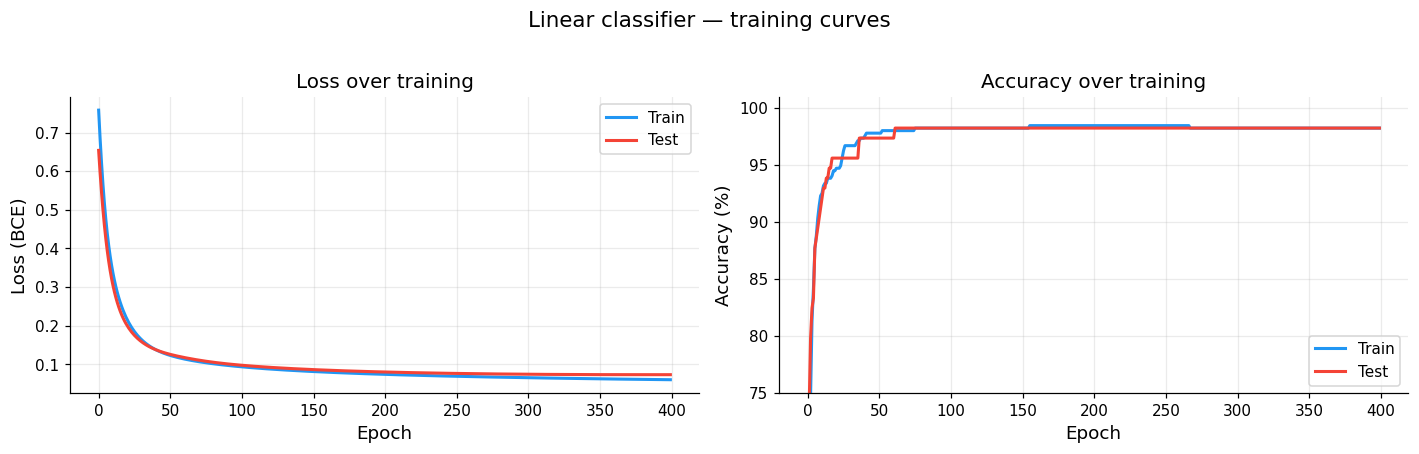


 If test accuracy is similar to train accuracy, the model generalises well.
   A big gap would mean overfitting — memorising training data rather than learning.


In [129]:
# ── Plot training curves ───────────────────────────────────────────────────────
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))

ax1.plot(lin_train_losses, color='#2196F3', lw=2, label='Train')
ax1.plot(lin_test_losses,  color='#F44336', lw=2, label='Test')
ax1.set_xlabel('Epoch', fontsize=12); ax1.set_ylabel('Loss (BCE)', fontsize=12)
ax1.set_title('Loss over training', fontsize=13)
ax1.legend(); ax1.grid(alpha=0.25)

ax2.plot([a*100 for a in lin_train_accs], color='#2196F3', lw=2, label='Train')
ax2.plot([a*100 for a in lin_test_accs],  color='#F44336', lw=2, label='Test')
ax2.set_xlabel('Epoch', fontsize=12); ax2.set_ylabel('Accuracy (%)', fontsize=12)
ax2.set_title('Accuracy over training', fontsize=13)
ax2.set_ylim(75, 101)
ax2.legend(); ax2.grid(alpha=0.25)

plt.suptitle('Linear classifier — training curves', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

print("\n If test accuracy is similar to train accuracy, the model generalises well.")
print("   A big gap would mean overfitting — memorising training data rather than learning.")


---
## Section C — Neural Network

The linear model can only draw a *straight line* (hyperplane) through the feature space.  
Many real patterns are not linear.

A **neural network** adds *hidden layers* between input and output.  
Each hidden layer transforms the data non-linearly using an **activation function** (we use ReLU).  
By stacking layers, the network can learn complex, curved decision boundaries.

```
Input (30 features)
       ↓
 [Linear 30→64]  → ReLU   ← Hidden layer 1
       ↓
 [Linear 64→32]  → ReLU   ← Hidden layer 2
       ↓
 [Linear 32→1]   → Sigmoid
       ↓
 Output: P(Malignant)
```

**ReLU** (Rectified Linear Unit) = `max(0, x)` — zeroes out negative values.  
It is fast, simple, and works very well in practice.


In [130]:
torch.manual_seed(0)

neural_net = nn.Sequential(
    nn.Linear(30, 64),   # hidden layer 1: 30 → 64 neurons
    nn.ReLU(),
    nn.Linear(64, 32),   # hidden layer 2: 64 → 32 neurons
    nn.ReLU(),
    nn.Linear(32, 1),    # output layer: 32 → 1
    nn.Sigmoid()
)

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(neural_net.parameters(), lr=0.005)

total_params = sum(p.numel() for p in neural_net.parameters())
print("Neural network architecture:")
print(neural_net)
print(f"\nTotal trainable parameters: {total_params:,}")
print("(compared to 31 for the linear model)")


Neural network architecture:
Sequential(
  (0): Linear(in_features=30, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=1, bias=True)
  (5): Sigmoid()
)

Total trainable parameters: 4,097
(compared to 31 for the linear model)


In [131]:
# ── Training loop (same structure as before) ───────────────────────────────────
nn_train_losses, nn_test_losses = [], []
nn_train_accs,   nn_test_accs   = [], []

print(f"{'Epoch':>6}  {'Train Loss':>12}  {'Test Loss':>10}  {'Train Acc':>10}  {'Test Acc':>9}")
print("-" * 56)

for epoch in range(400):
    neural_net.train()
    pred_train = neural_net(X_train_t)
    loss_train = criterion(pred_train, y_train_t)
    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()

    neural_net.eval()
    with torch.no_grad():
        pred_test  = neural_net(X_test_t)
        loss_test  = criterion(pred_test, y_test_t)
        acc_train  = ((pred_train > 0.5) == y_train_t).float().mean().item()
        acc_test   = ((pred_test  > 0.5) == y_test_t ).float().mean().item()

    nn_train_losses.append(loss_train.item()); nn_test_losses.append(loss_test.item())
    nn_train_accs.append(acc_train);           nn_test_accs.append(acc_test)

    if (epoch + 1) % 50 == 0 or epoch == 0:
        print(f"{epoch+1:>6}  {loss_train.item():>12.4f}  {loss_test.item():>10.4f}"
              f"  {acc_train*100:>9.1f}%  {acc_test*100:>8.1f}%")

print(f"\nNeural net — train accuracy : {nn_train_accs[-1]*100:.1f}%")
print(f"Neural net — test  accuracy : {nn_test_accs[-1]*100:.1f}%")


 Epoch    Train Loss   Test Loss   Train Acc   Test Acc
--------------------------------------------------------
     1        0.6981      0.6574       38.2%      71.1%
    50        0.0294      0.0870       99.3%      98.2%
   100        0.0029      0.1653      100.0%      97.4%
   150        0.0008      0.2239      100.0%      97.4%
   200        0.0004      0.2531      100.0%      97.4%
   250        0.0002      0.2745      100.0%      97.4%
   300        0.0001      0.2913      100.0%      97.4%
   350        0.0001      0.3054      100.0%      97.4%
   400        0.0001      0.3180      100.0%      97.4%

Neural net — train accuracy : 100.0%
Neural net — test  accuracy : 97.4%


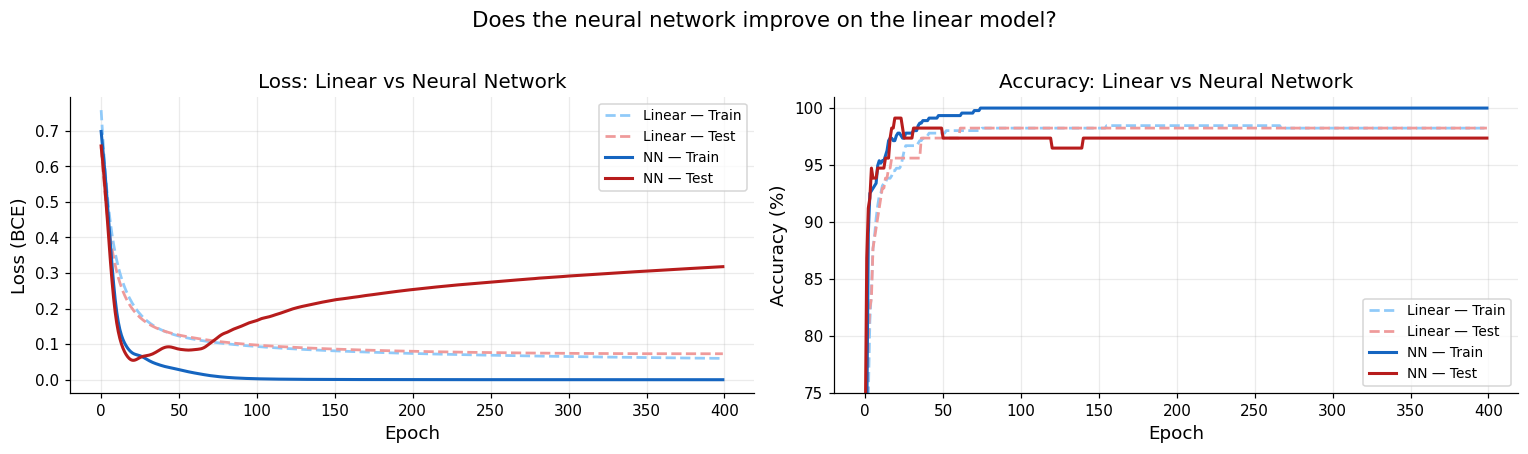

In [132]:
# ── Side-by-side comparison: linear model vs neural network ───────────────────
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Loss
axes[0].plot(lin_train_losses, '--', color='#90CAF9', lw=1.8, label='Linear — Train')
axes[0].plot(lin_test_losses,  '--', color='#EF9A9A', lw=1.8, label='Linear — Test')
axes[0].plot(nn_train_losses,        color='#1565C0', lw=2.0, label='NN — Train')
axes[0].plot(nn_test_losses,         color='#B71C1C', lw=2.0, label='NN — Test')
axes[0].set_xlabel('Epoch', fontsize=12); axes[0].set_ylabel('Loss (BCE)', fontsize=12)
axes[0].set_title('Loss: Linear vs Neural Network', fontsize=13)
axes[0].legend(fontsize=9); axes[0].grid(alpha=0.25)

# Accuracy
axes[1].plot([a*100 for a in lin_train_accs], '--', color='#90CAF9', lw=1.8, label='Linear — Train')
axes[1].plot([a*100 for a in lin_test_accs],  '--', color='#EF9A9A', lw=1.8, label='Linear — Test')
axes[1].plot([a*100 for a in nn_train_accs],        color='#1565C0', lw=2.0, label='NN — Train')
axes[1].plot([a*100 for a in nn_test_accs],         color='#B71C1C', lw=2.0, label='NN — Test')
axes[1].set_xlabel('Epoch', fontsize=12); axes[1].set_ylabel('Accuracy (%)', fontsize=12)
axes[1].set_title('Accuracy: Linear vs Neural Network', fontsize=13)
axes[1].set_ylim(75, 101)
axes[1].legend(fontsize=9); axes[1].grid(alpha=0.25)

plt.suptitle('Does the neural network improve on the linear model?', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()


### 3.4 · Confusion matrix — beyond accuracy

Accuracy is useful, but in medicine we often care separately about:
- **Sensitivity** (recall): of all *actual* malignant cases, how many did we catch?  
  A missed cancer (false negative) can be life-threatening.
- **Specificity**: of all *actual* benign cases, how many did we correctly call benign?  
  An unnecessary biopsy (false positive) causes anxiety and cost.

The **confusion matrix** shows all four outcomes at once.


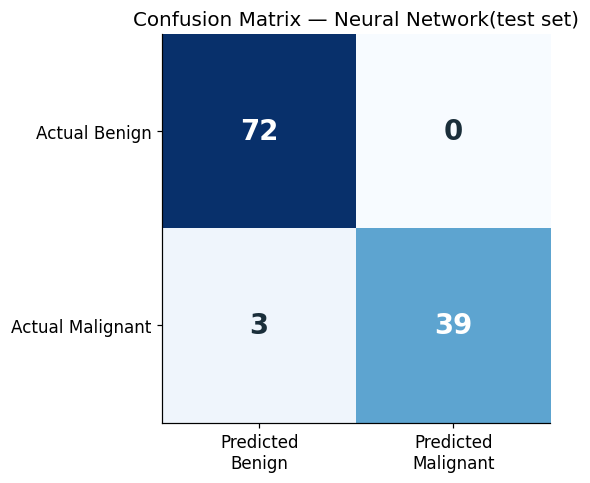


Detailed classification report:
              precision    recall  f1-score   support

      Benign       0.96      1.00      0.98        72
   Malignant       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

Sensitivity (how many malignant caught) : 92.9%
Specificity (how many benign correct)   : 100.0%


In [133]:
from sklearn.metrics import confusion_matrix, classification_report

# Get final predictions from the neural network
neural_net.eval()
with torch.no_grad():
    probs_test = neural_net(X_test_t).squeeze().numpy()

preds_test = (probs_test > 0.5).astype(int)
true_test  = y_test.astype(int)

# Confusion matrix
cm = confusion_matrix(true_test, preds_test)

fig, ax = plt.subplots(figsize=(5, 4.5))
im = ax.imshow(cm, cmap='Blues')

ax.set_xticks([0, 1]); ax.set_yticks([0, 1])
ax.set_xticklabels(['Predicted\nBenign', 'Predicted\nMalignant'], fontsize=11)
ax.set_yticklabels(['Actual Benign', 'Actual Malignant'], fontsize=11)

for i in range(2):
    for j in range(2):
        ax.text(j, i, str(cm[i, j]), ha='center', va='center',
                fontsize=18, fontweight='bold',
                color='white' if cm[i, j] > cm.max()/2 else '#1A2E3A')

ax.set_title('Confusion Matrix — Neural Network(test set)', fontsize=13)
plt.tight_layout()
plt.show()

# Full classification report
print("\nDetailed classification report:")
print(classification_report(true_test, preds_test,
                             target_names=['Benign', 'Malignant']))

tn, fp, fn, tp = cm.ravel()
print(f"Sensitivity (how many malignant caught) : {tp/(tp+fn)*100:.1f}%")
print(f"Specificity (how many benign correct)   : {tn/(tn+fp)*100:.1f}%")


---
### Exercise 3 — Design your own network

Modify the architecture below and observe the effect on accuracy and the confusion matrix.

**Things to try:**
1. **Add a third hidden layer** — insert `nn.Linear(32, 16)` + `nn.ReLU()` before the output
2. **Widen the layers** — try 128 neurons in the first hidden layer instead of 64
3. **Change the learning rate** — try `lr=0.001` (slower) or `lr=0.02` (faster)
4. **Train for longer** — change `400` to `800` epochs

**Things to think about:**
- Does a bigger network always improve test accuracy?
- What happens to sensitivity if you get a slightly worse model?
- What trade-off would you make in a medical setting?


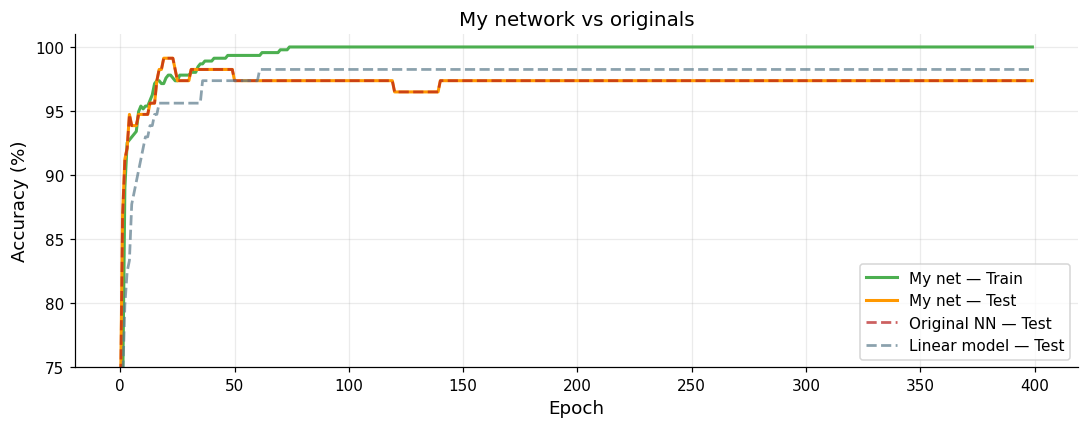

My network — train: 100.0%  |  test: 97.4%
Original NN —       train: 100.0%  |  test: 97.4%


In [134]:
# YOUR TURN — modify the architecture below!
torch.manual_seed(0)

my_net = nn.Sequential(
    nn.Linear(30, 64),   # try changing 64 to 128
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    # try adding another layer here, e.g.:
    # nn.Linear(32, 16),
    # nn.ReLU(),
    nn.Linear(32, 1),
    nn.Sigmoid()
)

criterion   = nn.BCELoss()
optimizer   = torch.optim.Adam(my_net.parameters(), lr=0.005)  # ✏️ try changing lr

my_train_accs, my_test_accs = [], []

for epoch in range(400):   # try changing to 800
    my_net.train()
    pred_train = my_net(X_train_t)
    loss = criterion(pred_train, y_train_t)
    optimizer.zero_grad(); loss.backward(); optimizer.step()

    my_net.eval()
    with torch.no_grad():
        pred_test = my_net(X_test_t)
        my_train_accs.append(((pred_train > 0.5) == y_train_t).float().mean().item())
        my_test_accs.append( ((pred_test  > 0.5) == y_test_t ).float().mean().item())

# ── Plot comparison ────────────────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot([a*100 for a in my_train_accs],  color='#4CAF50', lw=2,   label='My net — Train')
ax.plot([a*100 for a in my_test_accs],   color='#FF9800', lw=2,   label='My net — Test')
ax.plot([a*100 for a in nn_test_accs],  '--', color='#B71C1C', lw=1.8, alpha=0.7, label='Original NN — Test')
ax.plot([a*100 for a in lin_test_accs], '--', color='#5A7A8A', lw=1.8, alpha=0.7, label='Linear model — Test')
ax.set_xlabel('Epoch', fontsize=12); ax.set_ylabel('Accuracy (%)', fontsize=12)
ax.set_title('My network vs originals', fontsize=13)
ax.set_ylim(75, 101)
ax.legend(fontsize=10); ax.grid(alpha=0.25)
plt.tight_layout()
plt.show()

print(f"My network — train: {my_train_accs[-1]*100:.1f}%  |  test: {my_test_accs[-1]*100:.1f}%")
print(f"Original NN —       train: {nn_train_accs[-1]*100:.1f}%  |  test: {nn_test_accs[-1]*100:.1f}%")


---
## Workshop Complete!

### What you have done

| Section | What you learned |
|---------|-----------------|
| Part 1 | Loaded and explored a real clinical dataset; visualised feature distributions; identified which features predict the diagnosis |
| Part 2 | (scikit-learn session) PCA, train/test split, classical ML |
| Part 3A | Saw gradient descent learn in real time by fitting a polynomial |
| Part 3B | Applied the same idea to classify tumours with a linear model |
| Part 3C | Built a neural network with hidden layers and compared it to the linear model |

### Key takeaways

- **Data exploration always comes first** — visualising your data reveals structure, outliers, and which features matter
- **Gradient descent is universal** — the same algorithm that fit the sine curve trained the cancer classifier
- **PyTorch makes autodiff automatic** — `loss.backward()` does all the calculus for you
- **More complex ≠ always better** — a neural network has more capacity, but it can also overfit
- **Metrics beyond accuracy matter** — in medicine, sensitivity and specificity have very different consequences

### Where to go next

- **scikit-learn docs**: sklearn.org — classical ML, lots of examples
- **PyTorch tutorials**: pytorch.org/tutorials — official, excellent
- **fast.ai course**: fast.ai — practical deep learning, free, biology-friendly
- **Papers with Code**: paperswithcode.com — state-of-the-art results with code
